In [ ]:
# # create a virtual env, install specific version of libraries used in lab
# # attempt to load the existing env if it exists
# # if it does not exist, then create it and activate it
# ! source ./.venv/bin/activate || python3 -m venv ./.venv && source ./.venv/bin/activate

# # upgrade pip
# ! pip3 install --upgrade pip

# # install dependencies. ipykernel is required.
# ! pip install ipykernel matplotlib pylatexenc pandas seaborn --quiet


In [ ]:
import statistics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


In [ ]:
# https://www.kaggle.com/datasets/ash316/forbes-top-2000-companies
forbes_data = pd.read_csv('Forbes Top2000 2017.csv')
forbes_data.head()


In [ ]:
# see if there are any null values in the data set
forbes_data.isnull().sum()

In [ ]:
# drop the null values and verify they're gone
# GOTCHA: hadd to add the how and axis parameters
# otherwise it deleted ALL rows within the dataframe
# axis=0 # default, drops ROWS that contain missing values
# axis=1 # not default, drops COLUMNS that contain missing values
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
# how=any If any NA values are present, drop that row or column.
# how=all If all values are NA, drop that row or column.
# I also had to add the subset to manually specify which columns to include
# otherwise it didn't work
# The video was recorded in 2021 and probably used an older version of Pandas
forbes_data.dropna(how='any', subset=['Sector', 'Industry'], inplace=True)
forbes_data.isnull().sum()

In [ ]:
forbes_data.shape


In [ ]:
market_value_mean = forbes_data['Market Value'].mean()
market_value_mean

In [ ]:
market_value_med = forbes_data['Market Value'].median()
market_value_med

In [ ]:
# getting the Mode
forbes_data['Sector'].value_counts()
# the most common Sector is Financials


In [ ]:
sector_mode = forbes_data['Sector'].mode()
sector_mode

# normal for it to return a "0" leading the Financials

In [ ]:
# plot all data in raw format
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')

plt.title('Forbes Data')
plt.show()

In [ ]:
# There were a lot of outliers, so adding a new limitation on y-axis
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

# addition:
plt.ylim(0,80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')

plt.title('Forbes Data')
plt.show()

In [ ]:
# https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/6890dda1-93e6-4d17-a91d-35d55fed4d46/b37bf402-ceed-4323-b994-d7c39dc75841

prof_max = forbes_data['Profits'].max()

prof_max

In [ ]:

prof_min = forbes_data['Profits'].min()

prof_min

In [ ]:
prof_range = prof_max - prof_min
prof_range
# surprisingly, there is not a .range() function


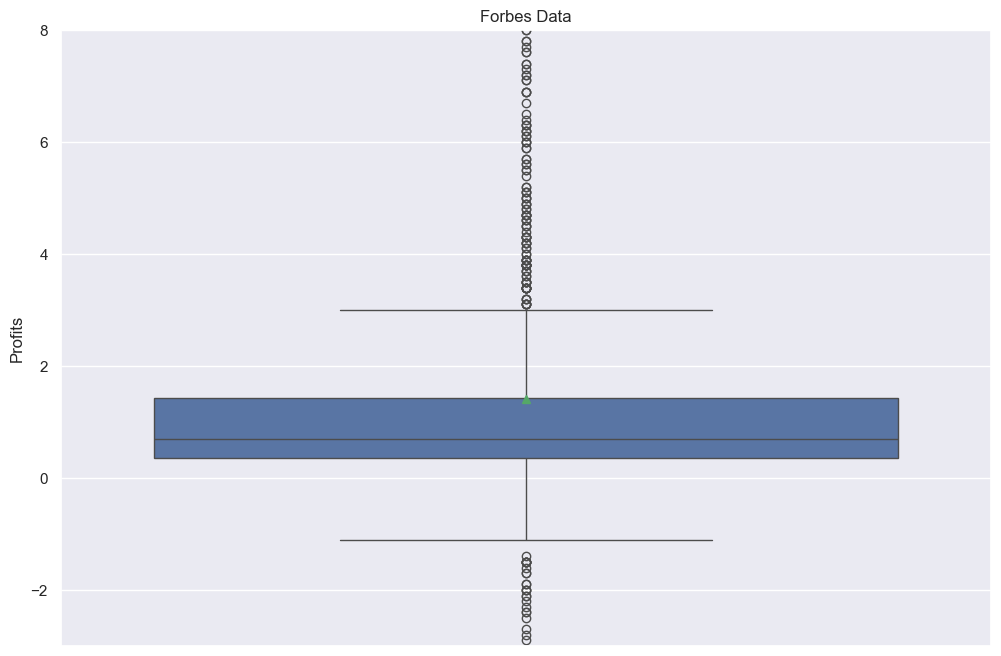

In [65]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Data')

# set limits
plt.ylim(-3, 8)

plt.show()

In [66]:
# first quartile percentile
Q1 = np.quantile(forbes_data['Profits'], 0.25)

Q1

0.34975

In [67]:
# first quartile percentile
Q3 = np.quantile(forbes_data['Profits'], 0.75)

Q3

1.4249999999999998

In [68]:
# inter quartile range from first to third quartile:
IQR = Q3 - Q1
IQR


1.0752499999999998

In [69]:
# Standard deviation

prof_std = forbes_data['Profits'].std()

prof_std

3.244201278603241

In [70]:
# Variance - the square of the standard deviation

prof_var = prof_std ** 2
prof_var

10.524841936090903

In [71]:
# directly computing the variance

prof_var = forbes_data['Profits'].var()

prof_var

10.524841936090903

In [72]:
# instead of computing all of these statistical values manually, you can just use .describe to calculate them for all
# columns that are numerical:

forbes_data.describe()

,Unnamed: 0,Rank,Sales,Profits,Assets,Market Value
count,0.0,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,NaN,909.135279,19.623046,1.407430,97.647016,26.978494
std,NaN,554.044456,30.875809,3.244201,287.036157,47.099541
min,NaN,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,NaN,433.750000,4.900000,0.349750,12.800000,7.300000
50%,NaN,883.500000,10.300000,0.692500,25.900000,13.100000
75%,NaN,1354.250000,19.900000,1.425000,60.325000,26.900000
max,NaN,1999.000000,485.300000,45.200000,3473.200000,752.000000
